# Week 2 Assignment : Quantum circuits
Author : Anupama Ray, Research Scientist & IBM Quantum Technical Ambassador, IBM Research India

 We will learn to implement Basic circuits and Quantum concepts learnt in Week 1 and Week 2 of the course in this notebook. First lets import all the required libraries

In [5]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, IBMQ
from qiskit_aer import Aer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ImportError: cannot import name 'IBMQ' from 'qiskit' (c:\Users\abh10\miniconda3\envs\ibmq\Lib\site-packages\qiskit\__init__.py)

In [6]:
from qiskit import assemble
import numpy as np
import matplotlib.pyplot as plt

Space for trying out answers
You can add any new cells in this notebook to try to figure out the answers for questions.


Exercise 2.1
# Question 1
Create a Quantum Circuit acting on a quantum register of three qubits, set the first qubit to superposition and entangle with the other qubits. 
You need to complete the function in the cell below to Create the above mentioned entangled state. 
 This Function should take a circuit object 'ckt', and an integer 'n' : The number of data qubits 
 

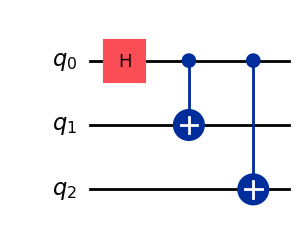

In [7]:
ckt = QuantumCircuit(3)
def create_entangledstate_function(ckt):
    
    pass
    
ckt.h(0)
ckt.cx(0,1)
ckt.cx(0,2)
ckt.draw('mpl')




To run the above circuit using the statevector simulator, first you need to import Aer and then set the backend to statevector_simulator. 

In [8]:
# Import Aer
from qiskit_aer import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
# Create a Quantum Program for execution
job = backend.run(ckt)
result = job.result()




# Question 1.1
What is the the state vector for the quantum circuit? 

In [9]:
#complete the line to print the outputstate
outputstate = result.get_statevector(ckt)
print(outputstate)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


# Question 1.2
use the visualization function to plot the real and imaginary components of the state density matrix ρ.


In [10]:
from qiskit.visualization import *
#use the appropriate visualization tool to plot real and imaginary components of the state density matrix

Lets create a helper function that we can use multiple times. This function will execute a circuit on the state vector simulator and return state vector results, circuit diagram and Qsphere.

In [18]:
# Will execute the circuit on the state vector (sv) simulator
# Returns state vector results, circuit diagram, and QSphere 
def execute_circuit_sv(quantum_circuit):
    #Create a state vector simulator
    statevector_simulator = Aer.get_backend('statevector_simulator')
    #Execute the circuit on the simulator
    job = statevector_simulator.run(quantum_circuit)
    result = job.result()
    #Assign state vector results
    statevector_results  = result.get_statevector(quantum_circuit)
    #Draw the circuit diagram
    circuit_diagram = quantum_circuit.draw()
    #Draw the Qsphere 
    q_sphere = plot_state_qsphere(statevector_results)
    #Return the results, circuit diagram, and QSphere		
    return statevector_results, circuit_diagram, q_sphere

In [19]:
#complete the following lines to execute circuit
from qiskit import transpile
execute_circuit_sv(quantum_circuit=ckt)

(Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
              0.        +0.j, 0.        +0.j, 0.        +0.j,
              0.        +0.j, 0.70710678+0.j],
             dims=(2, 2, 2)),
      ┌───┐          
 q_0: ┤ H ├──■────■──
      └───┘┌─┴─┐  │  
 q_1: ─────┤ X ├──┼──
           └───┘┌─┴─┐
 q_2: ──────────┤ X ├
                └───┘,
 <Figure size 700x700 with 2 Axes>)

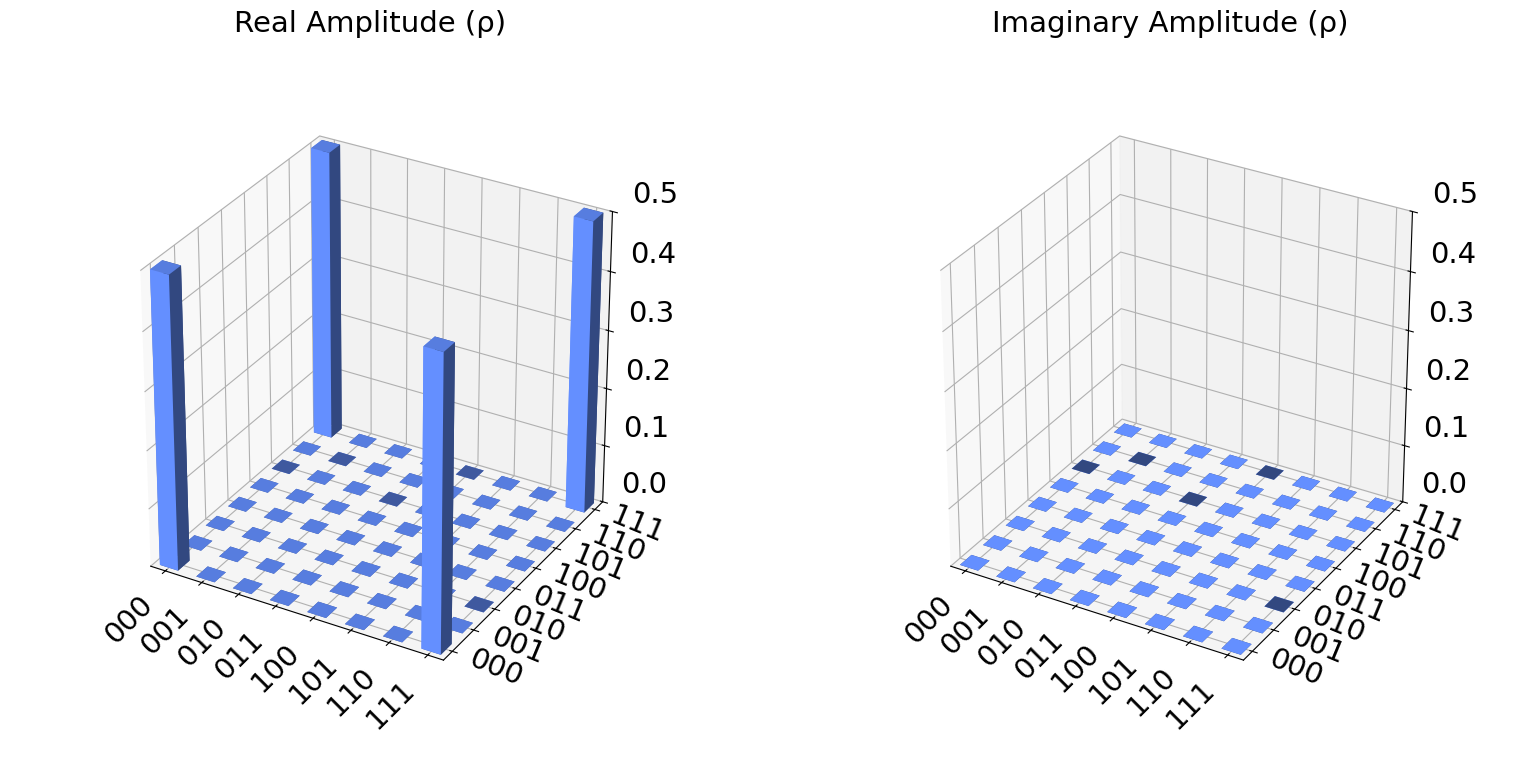

In [22]:
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city
rho = DensityMatrix(outputstate)    
plot_state_city(rho)

#Question 2

Demonstrating Phase kickback - ability to negate a state vector (add an X gate before H and Z gates)
premise:
Working with Phase gate (Pauli Z gate) which rotates along the longitude of the Hilbert space, hence the phase of the Hilbert space. So lets first create a circuit for Z gate


In [ ]:
#single qubit circuit creation
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0) #set qubit to superposition
qc.z(0) #add Z gate to rotate out of phase by pi/2
#write the next lines to execute circuit and capture results


So Z gate provides a way to perform a phase shift on a qubit causing the state of teh qubit to change its sign from psoitive to negative.
If x gate is used then the state result becomes negative. This ability to negate a state vector is called Phase Kickback.

# References 

1. I. Chuang & M. Nielsen, "Quantum Computation and Quantum Information", Cambridge: Cambridge University Press, 2000.

2. Qiskit Textbook : https://qiskit.org/textbook/
